___


___
# **RBNY vs NYCFC Performance Analysis**

# Load and Merge the Data

---

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import stats


In [115]:
# Load player stats data for 2024 mls games
rbny_season = pd.read_excel('mls_rbny_stats.xlsx')
nyc_season = pd.read_excel('mls_nyc_stats.xlsx')

# Load the game-specific data for RBNY and NYC
rbny_game = pd.read_excel('rbny_stats_sept_18_2024.xlsx')
nyc_game = pd.read_excel('nyc_stats_sept_18_2024.xlsx')

In [116]:
# Sample classification of players (this should be updated with accurate roles)
rbny_player_roles = {
    "L. Morgan": "Midfielder", "E. Forsberg": "Midfielder", "Elias Manoel": "Attacker", "C. Harper": "Attacker", "D. Vanzeir": "Attacker", "W. Carmona": "Midfielder",
    "D. Gjengaar": "Attacker", "J. Hall": "Attacker", "J. Tolkin": "Defender", "Frankie Amaya": "Midfielder", "C. Burke": "Attacker", "F. Carballo": "Midfielder",
    "K. Duncan": "Defender", "S. Ngoma Jr.": "Attacker", "A. Reyes": "Defender", "Bento Estrela": "Midfielder", "AJ Marcucci": "Goalkeeper", "R. Mitchell": "Attacker",
    "A. O'Connor": "Defender", "D. Odle": "Goalkeeper", "C. Ofori": "Defender", "T. Rosborough": "Midfielder", "M. Sofo": "Attacker", "S. Sserwadda": "Midfielder",
    "O. Valencia": "Defender", "D. Alexandre": "Defender", "Carlos Coronel": "Goalkeeper", "R. Donkor": "Midfielder", "D. Edelman": "Midfielder", "N. Eile": "Defender",
    "I. Kasule": "Midfielder", "R. Meara": "Goalkeeper", "W. Meyer": "Goalkeeper", "Juan Mina": "Defender", "O. Mullings": "Attacker", "Sean Nealis": "Defender",
    "Dylan Nealis": "Defender", "A. Shapiro-Thompson": "Midfielder", "A. Stokes": "Goalkeeper", "P. Stroud": "Midfielder"
}

nyc_player_roles = {
    "A. Martínez": "Attacker", "Santiago Rodríguez": "Midfielder", "H. Wolf": "Attacker", "M. Bakrar": "Attacker", "A. Ojeda": "Attacker", "A. Perea": "Midfielder",
    "J. Fernández": "Attacker", "K. Parks": "Midfielder", "T. Gray": "Defender", "M. Ilenic": "Defender", "M. Jones": "Attacker", "Talles Magno": "Attacker",
    "Thiago": "Defender", "M. Moralez": "Midfielder", "K. O'Toole": "Attacker", "J. Sands": "Midfielder", "J. Arroyave": "Midfielder", "A. Baiera": "Defender",
    "M. Carrizo": "Midfielder", "P. Elias": "Midfielder", "Rio Hope-Gund": "Defender",  "A. Jasson": "Midfielder", "N. Acevedo": "Midfielder", "Thiago Andrade": "Attacker",
    "L. Barraza": "Goalkeeper", "N. Benalcazar": "Defender", "J. Denis": "Attacker", "M. Freese": "Goalkeeper", "J. Haak": "Midfielder", "C. McFarlane": "Defender",
    "J. Mijatović": "Attacker", "C. Mizell": "Goalkeeper", "A. Morales": "Midfielder", "S. Owusu": "Defender", "M. Pellegrini": "Midfielder", "A. Rando": "Goalkeeper",
    "B. Risa": "Defender", "T. Romero": "Goalkeeper", "G. Segal": "Attacker", "J. Shore": "Midfielder", "S. Tanasijević": "Defender", "S. Turnbull": "Defender",
    "Z. Yañez": "Attacker"
}

Add a Team Column for each Player's Soccer Team  

In [117]:
# Add 'Team' column to distinguish the team of each player
rbny_season['Team'] = 'RBNY'
rbny_game['Team'] = 'RBNY'

nyc_season['Team'] = 'NYCFC'
nyc_game['Team'] = 'NYCFC'

Add a Role Column for each Player's Role/Position

In [118]:
# Concatenate the two datasets into one
combined_season = pd.concat([rbny_season, nyc_season], ignore_index=True)
combined_game = pd.concat([rbny_game, nyc_game], ignore_index=True)

# Add role column based on the player names and player_roles
combined_season['Role'] = combined_season['Player'].map({**rbny_player_roles, **nyc_player_roles})
combined_game['Role'] = combined_game['Player'].map({**rbny_player_roles, **nyc_player_roles})

In [119]:
combined_season.head()

,Player,Games Played,Games Started,Mins,Total Sub On,Goals,Accurate Pass %,Assists,Total Scoring Attempts,On target Scoring Attempts,Total Attacking Assists,Expected Goals,Fouls,Fouls Suffered,Offside,Yellow Cards,Red Cards,Team,Role
0,L. Morgan,29,26,2597,3,13,78.9,7,97,39,48,0.0,19,16,16,0,0,RBNY,Midfielder
1,E. Forsberg,19,15,1535,4,10,82.7,6,45,21,38,0.0,8,28,0,2,0,RBNY,Midfielder
2,Elias Manoel,33,0,1548,18,8,73.2,4,56,22,11,0.0,18,15,10,1,0,RBNY,Attacker
3,C. Harper,27,16,1597,11,5,67.5,1,45,23,24,0.0,23,27,3,3,0,RBNY,Attacker
4,D. Vanzeir,32,27,2258,5,5,68.1,10,55,20,35,0.0,35,12,15,2,0,RBNY,Attacker


# Evaluating the Importance of Key Soccer Stats for Goal Scoring

---


This correlation matrix shows the relationship between various soccer stats to the number of goals scored by RBNY and NYCFC.

Conclusions:
- On-Target Scoring Attempts is the strongest predictor of goals for both teams (0.95 for RBNY, 0.94 for NYCFC). More shots on target directly lead to more goals, making this a critical stat for scoring success.

- Total Scoring Attempts is also highly correlated with goals (0.90 for RBNY, 0.86 for NYCFC), indicating that simply creating more scoring chances contributes significantly to goal outcomes.

- Offside shows moderate to high correlation, suggesting that while important, it are less impactful than direct scoring attempts. A high number of offside calls may indicate an aggressive, forward-playing style that positions players close to the opponent’s goal. This approach risks offside violations but increases scoring opportunities by pushing defenders back and creating space for attackers.


Importance: 
- This analysis helps teams focus on the stats most linked to goals, guiding them to prioritize on-target shots and total attempts to improve scoring chances.

                            RBNY Correlation  NYCFC Correlation  \
On target Scoring Attempts          0.945933           0.942309   
Total Scoring Attempts              0.902069           0.860768   
Offside                             0.745384           0.786004   
Total Attacking Assists             0.663709           0.594353   
Fouls Suffered                      0.339043           0.541980   
Accurate Pass %                     0.350462           0.345827   
Expected Goals                     -0.030845          -0.019474   

                            Average Correlation  
On target Scoring Attempts             0.944121  
Total Scoring Attempts                 0.881418  
Offside                                0.765694  
Total Attacking Assists                0.629031  
Fouls Suffered                         0.440511  
Accurate Pass %                        0.348145  
Expected Goals                        -0.025159  


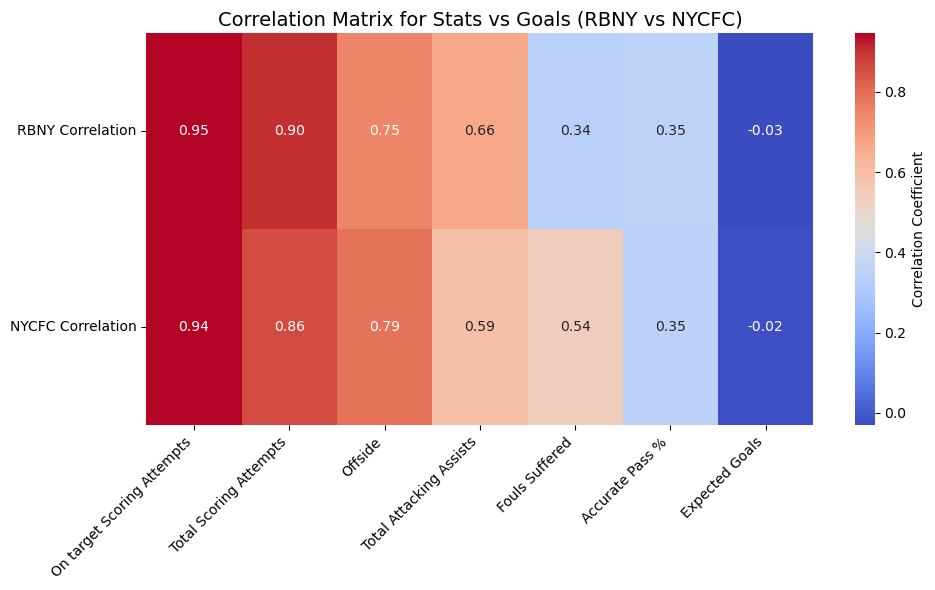

In [120]:

# Columns of interest for the game-specific comparison
columns_to_plot = [
    'Expected Goals', 'On target Scoring Attempts', 'Total Scoring Attempts',
    'Accurate Pass %', 'Fouls Suffered', 'Offside', 'Total Attacking Assists', 
]


# Initialize dictionaries to store correlation coefficients
rbny_corr = {}
nycfc_corr = {}

# Loop through each stat and calculate correlation with 'Goals' for both teams
for stat in columns_to_plot:
    rbny_corr[stat] = combined_season[combined_season['Team'] == 'RBNY'][stat].corr(combined_season[combined_season['Team'] == 'RBNY']['Goals'])
    nycfc_corr[stat] = combined_season[combined_season['Team'] == 'NYCFC'][stat].corr(combined_season[combined_season['Team'] == 'NYCFC']['Goals'])

# Create a DataFrame to display the correlation matrix
corr_matrix = pd.DataFrame({
    'RBNY Correlation': pd.Series(rbny_corr),
    'NYCFC Correlation': pd.Series(nycfc_corr)
})

# Calculate the average correlation across both teams
corr_matrix['Average Correlation'] = corr_matrix.mean(axis=1)

# Sort the DataFrame by the average correlation from highest to lowest
corr_matrix = corr_matrix.sort_values(by='Average Correlation', ascending=False)

# Display the sorted correlation matrix
print(corr_matrix)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))

# Use Seaborn to create a heatmap
sns.heatmap(corr_matrix[['RBNY Correlation', 'NYCFC Correlation']].T,
            annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            xticklabels=corr_matrix.index, yticklabels=['RBNY Correlation', 'NYCFC Correlation'],
            annot_kws={'size': 10}, cbar_kws={'label': 'Correlation Coefficient'})

# Adjust x-axis label rotation
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)

# Title and Layout
plt.title('Correlation Matrix for Stats vs Goals (RBNY vs NYCFC)', fontsize=14)
plt.tight_layout()
plt.show()

# Analysis of Player Roles for RBNY and NYCFC in 2024 MLS Games

---

These graphs highlight how different player roles contribute to key soccer stats for RBNY and NYCFC in MLS games of 2024.

Results:
- Goals and Scoring Attempts: RBNY attackers slightly outperformed NYCFC in goals and on-target attempts, reflecting their primary role in scoring.
- Total Scoring Attempts: RBNY attackers led in attempts, while NYCFC midfielders also contributed, indicating a more balanced attack.
- Assists: NYCFC midfielders led in assists, highlighting their playmaking role, while RBNY’s midfielders were less involved, suggesting a more direct approach.
- Pass Accuracy: Both teams had strong pass accuracy from midfielders and defenders, with NYCFC showing slightly better passing precision, pointing to a possession-based style.

Conclusions:
- Attacking Strategies: RBNY relies heavily on attackers, while NYCFC’s approach is more balanced, involving midfielders more in scoring opportunities.
- Possession and Playmaking: NYCFC shows strengths in assists and passing accuracy, suggesting a possession-oriented style.
- Defensive Impact: Both teams’ defenders are aggressive, as seen in fouls and yellow cards, essential for breaking up opposition plays.

In [1]:
# Define columns for plotting
columns_to_plot = ['Goals', 'On target Scoring Attempts','Total Scoring Attempts', 
    'Assists', 'Total Attacking Assists', 'Accurate Pass %',
    'Fouls', 'Fouls Suffered', 'Yellow Cards', 'Red Cards']  # Example stats to compare

n_cols = 3

# First, check how many plots have data (non-zero stats)
valid_stats = []

for stat in columns_to_plot:
    rbny_role_stats = combined_season[combined_season['Team'] == 'RBNY'].groupby('Role')[stat].sum()
    nyc_role_stats = combined_season[combined_season['Team'] == 'NYCFC'].groupby('Role')[stat].sum()
    
    # Check if there are any non-zero values in either team's stats for this stat
    if rbny_role_stats.sum() != 0 or nyc_role_stats.sum() != 0:
        valid_stats.append(stat)

n_rows = int(np.ceil(len(valid_stats) / n_cols))

# Create a subplot with the dynamically calculated number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through each valid stat to plot
for idx, stat in enumerate(valid_stats):
    ax = axes[idx]

    # Aggregate the data for RBNY and NYC by role and stat
    rbny_role_stats = combined_season[combined_season['Team'] == 'RBNY'].groupby('Role')[stat].sum()
    nyc_role_stats = combined_season[combined_season['Team'] == 'NYCFC'].groupby('Role')[stat].sum()

    # Align roles for both teams
    roles = sorted(set(rbny_role_stats.index).union(set(nyc_role_stats.index)))

    # Move 'Goalkeeper' to the end
    if 'Goalkeeper' in roles:
        roles.remove('Goalkeeper')
        roles.append('Goalkeeper')

    rbny_stats = rbny_role_stats.reindex(roles, fill_value=0)
    nyc_stats = nyc_role_stats.reindex(roles, fill_value=0)

    # Create bar chart only if there are non-zero values
    if rbny_stats.sum() == 0 and nyc_stats.sum() == 0:
        ax.set_visible(False)  # Hide the plot if all values are zero
        continue  # Skip to the next stat

    bar_width = 0.35
    index = np.arange(len(roles))

    ax.bar(index - bar_width / 2, rbny_stats, bar_width, label='RBNY', color='#e83434')
    ax.bar(index + bar_width / 2, nyc_stats, bar_width, label='NYCFC', color='#282c5c')

    ax.set_xlabel('Player Role')
    ax.set_ylabel(stat)
    ax.set_title(f'{stat} by Player Role')
    ax.set_xticks(index)
    ax.set_xticklabels(roles, rotation=45)
    ax.legend()

# Hide any remaining axes (in case of unused subplots)
for i in range(len(valid_stats), len(axes)):
    axes[i].axis('off')  # Hide unused axes

# Adjust layout to avoid extra white space
plt.tight_layout(pad=2.0)

plt.show()


NameError: name 'combined_season' is not defined

In [122]:
combined_season.head()

,Player,Games Played,Games Started,Mins,Total Sub On,Goals,Accurate Pass %,Assists,Total Scoring Attempts,On target Scoring Attempts,Total Attacking Assists,Expected Goals,Fouls,Fouls Suffered,Offside,Yellow Cards,Red Cards,Team,Role
0,L. Morgan,29,26,2597,3,13,78.9,7,97,39,48,0.0,19,16,16,0,0,RBNY,Midfielder
1,E. Forsberg,19,15,1535,4,10,82.7,6,45,21,38,0.0,8,28,0,2,0,RBNY,Midfielder
2,Elias Manoel,33,0,1548,18,8,73.2,4,56,22,11,0.0,18,15,10,1,0,RBNY,Attacker
3,C. Harper,27,16,1597,11,5,67.5,1,45,23,24,0.0,23,27,3,3,0,RBNY,Attacker
4,D. Vanzeir,32,27,2258,5,5,68.1,10,55,20,35,0.0,35,12,15,2,0,RBNY,Attacker


# Comparing Players' Roles for RBNY and NYCFC on Sept 18, 2024

---

Looking at these metrics from this specific game where NYCFC won, there are only subtle differences between the teams that don’t clearly explain why RBNY lost. Here’s a breakdown of what stands out:

Results:
- Goals and Scoring Attempts: NYCFC’s attackers and midfielders outperformed RBNY in both total and on-target attempts, which likely contributed to their ability to score more goals.
- Assists and Attacking Assists: NYCFC’s midfielders provided slightly more assists, indicating better coordination in the attack, which could have helped them capitalize on scoring chances.
- Pass Accuracy: NYCFC’s midfielders had a higher pass accuracy, suggesting they controlled possession better and created more structured attacks.

Conclusions:
- Overall, NYCFC’s slight edge in offensive coordination and passing accuracy likely contributed to their win, but these metrics alone don’t fully explain why RBNY lost.

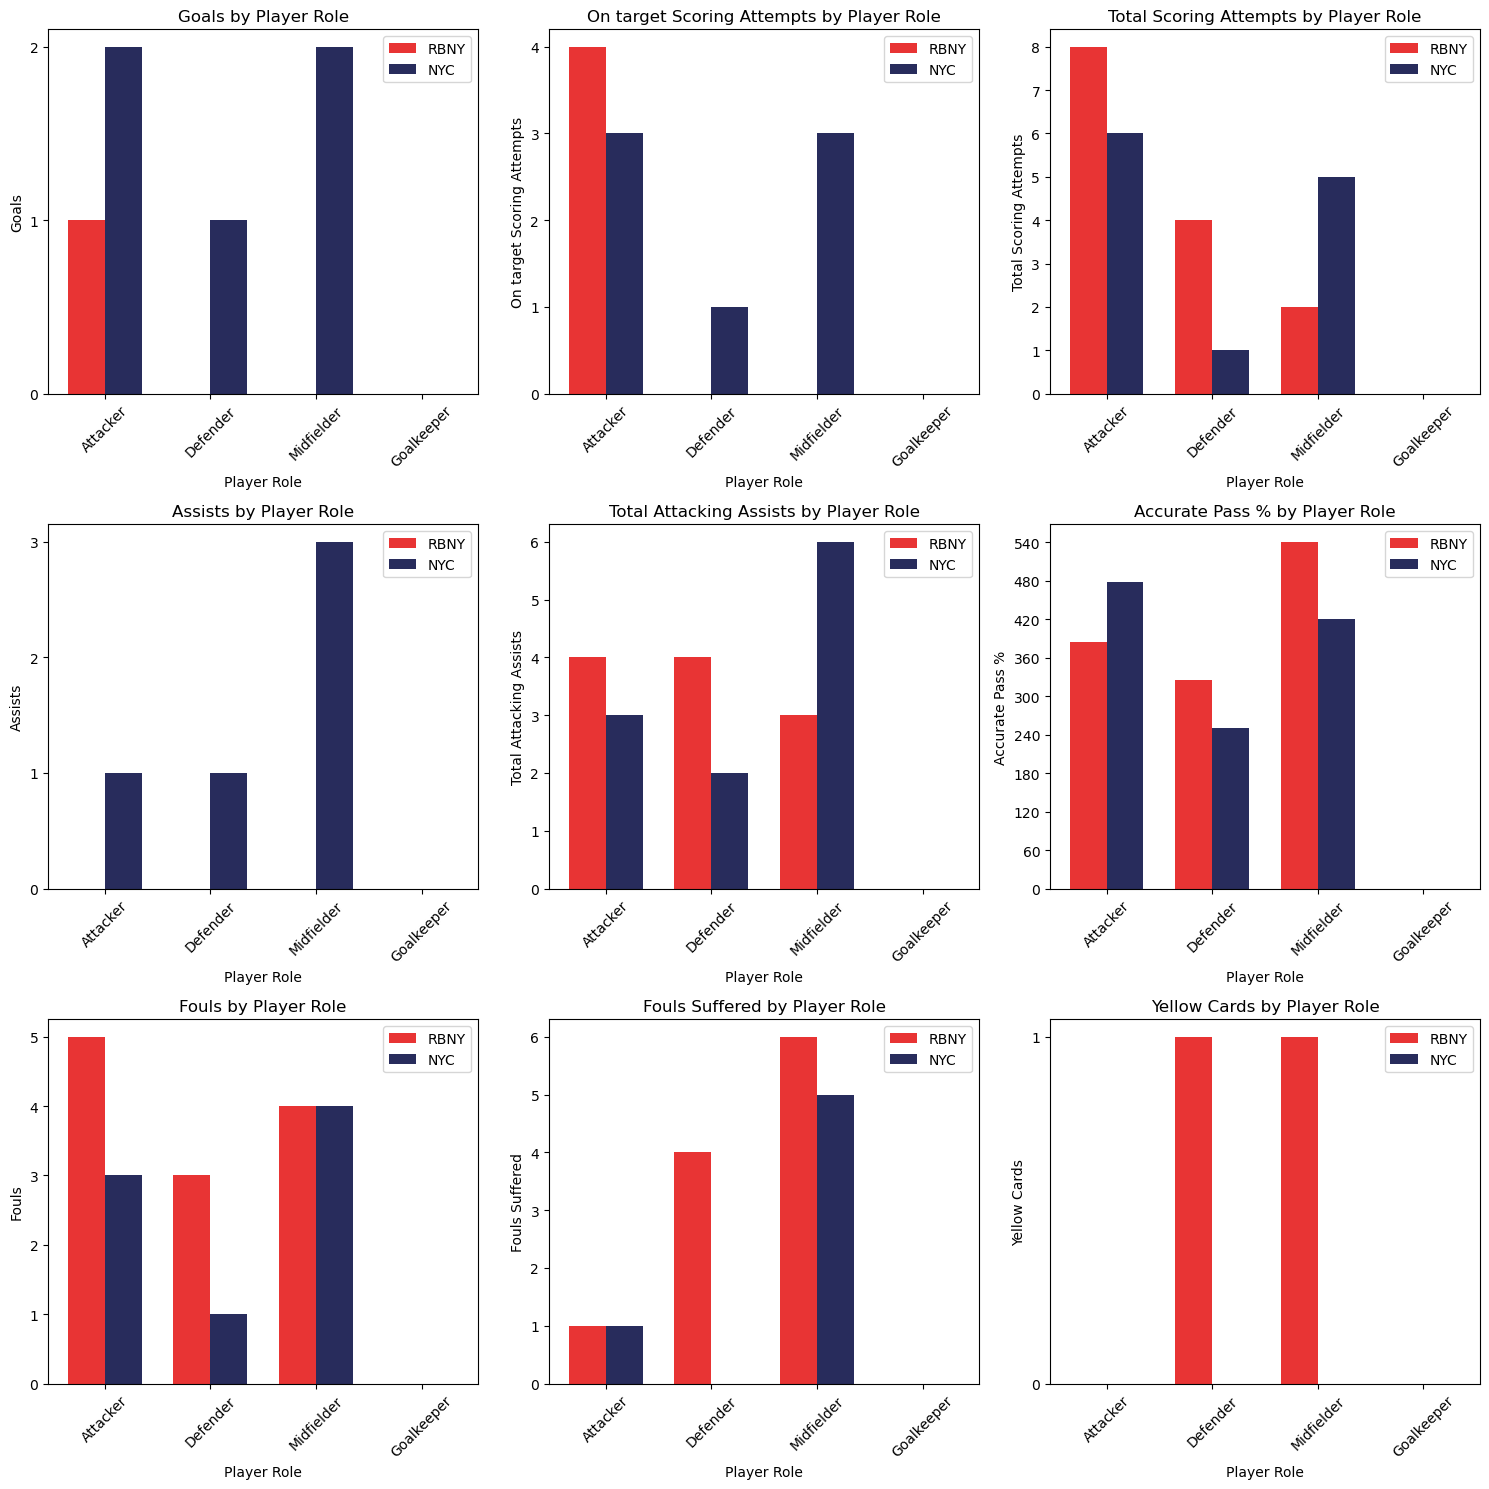

In [123]:
# Columns of interest for the game-specific comparison
columns_to_plot = [
    'Goals', 'On target Scoring Attempts', 'Total Scoring Attempts',
    'Assists', 'Total Attacking Assists', 'Accurate Pass %', 
    'Fouls', 'Fouls Suffered', 'Yellow Cards'
]

# Number of subplots (adjust according to number of stats you want to compare)
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop through each stat to plot
for idx, stat in enumerate(columns_to_plot):
    ax = axes[idx]
    
    # Aggregate the game data for RBNY and NYC by role and stat
    rbny_role_stats = combined_game[combined_game['Team'] == 'RBNY'].groupby('Role')[stat].sum()
    nyc_role_stats = combined_game[combined_game['Team'] == 'NYCFC'].groupby('Role')[stat].sum()

    # Align roles for both teams
    roles = sorted(set(rbny_role_stats.index).union(set(nyc_role_stats.index)))

    # Move 'Goalkeeper' to the end
    if 'Goalkeeper' in roles:
        roles.remove('Goalkeeper')
        roles.append('Goalkeeper')

    rbny_stats = rbny_role_stats.reindex(roles, fill_value=0)
    nyc_stats = nyc_role_stats.reindex(roles, fill_value=0)

    # Create bar chart for the stat comparison
    bar_width = 0.35
    index = np.arange(len(roles))

    ax.bar(index - bar_width / 2, rbny_stats, bar_width, label='RBNY', color='#e83434')  # RBNY color
    ax.bar(index + bar_width / 2, nyc_stats, bar_width, label='NYC', color='#282c5c')  # NYC color

    # Labels and title
    ax.set_xlabel('Player Role')
    ax.set_ylabel(stat)
    ax.set_title(f'{stat} by Player Role')
    ax.set_xticks(index)
    ax.set_xticklabels(roles, rotation=45)
    ax.legend()

    # Set y-axis ticks to integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Adjust layout to make sure titles and labels fit well
plt.tight_layout()
plt.show()